In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_string_dtype, is_numeric_dtype
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.preprocessing import PolynomialFeatures



This is notes to myself, a pre-university student who has not formally started studying econs and computer science yet so pls dont judge if its badly written. If you would like to point out some glaring error or discuss anything in general, my email is isaacyang2002@gmail.com :). So in H2 (my high school syllabus) we learnt that we UE and inflation are often in conflict. Empirically, we also see this occurring, as stated by my man Philips. Generally, the sacrifice ratio has been used pretty frequently by most policy-makers too, and some famous instances of UE and inflation in conflict include the Volcker disinflation period. Anyways, I would be (correctly, I hope) making use of some simple linear regression techniques to see if inflation alone is a strong predictor for unemployment. The data I used is obtained from the Singapore Ministry of Manpower, you can probably find them online just by searching "Singapore UE statistics" and what not. Anyways, have fun (or don't idk).
<br> 
p.s.: the math is at the bottom half. I tried to add some math but I cannot do math.

In [7]:
cpi = pd.read_csv("C:\\development\\random_data\\econs_data\\inflation\\cpi.csv") 
cpi.head(20) 
#cool! so there's 3 different types of inflation here, I think to start off I will look at MAS core inflation only!


,year,level_1,value
0,1990,MAS Core Inflation Measure,62.094
1,1990,Services Inflation Measure,na
2,1990,Retail & Other Goods Inflation Measure,na
3,1990,Electricity & Gas Inflation Measure,na
4,1991,MAS Core Inflation Measure,64.359
5,1991,Services Inflation Measure,na
6,1991,Retail & Other Goods Inflation Measure,na
7,1991,Electricity & Gas Inflation Measure,na
8,1992,MAS Core Inflation Measure,65.398
9,1992,Services Inflation Measure,na


In [10]:
data = np.genfromtxt('C:\\development\\random_data\\econs_data\\inflation\\cpi.csv', delimiter=',')


In [11]:
list = []
sum = 0
for i in data[9:]: #note i put [9:] because the UE data is from 1992 onwards, probably because Singapore is only like 50 years old
    if sum % 4 == 0:
        list.append(i[2])
    sum +=1
#I feel like this is the clumsiest method to get the core inflations but i just am unable to can. Anyways theres 29 values now
#hmm, 29 isn't a really large value to go by for linear regression innit but ok whatever

In [12]:
core = []
sum =0
for x in list[1:]:
    inf = (x - list[sum])/list[sum]*100
    core.append(inf)
    sum+=1
print(core)

[1.7798709440655702, 2.5299720561281176, 2.19500043958621, 1.796570314292269, 1.5409101793033426, 0.3953336754934885, 0.49740245385210485, 1.4875714914210205, 1.5538215611368578, -0.05069032215033242, 0.9395811923605555, 1.9886025571524968, 1.256239061385874, 1.716941513878923, 2.2027817987286804, 5.673994704107413, -0.02214400596723323, 1.5154517794901055, 2.1668982465004656, 2.5491738788355636, 1.7109099278809345, 1.9482968566471544, 0.49573498789729525, 0.9013841558332425, 1.4530974742789147, 1.6840136858220185, 1.0448032657680477, -0.15500000000000114]


In [13]:
np_core = np.array(core).reshape(-1, 1)
transformer = PolynomialFeatures(degree=2, include_bias=False) #highest being X^2
transformer.fit(np_core)

PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)

In [16]:
#now onto UE!
UE = pd.read_csv("C:\\development\\random_data\\econs_data\\unemployment\\UE_rate.csv")
UE.head()
#aha since the format of this data is like this, its much easier and I don't havae to use the np.genfromtxt thing that i copied 
#from stackexchange

,year,residential_status,unemployment_rate
0,1992,overall,1.8
1,1993,overall,1.7
2,1994,overall,1.7
3,1995,overall,1.8
4,1996,overall,1.7


In [17]:
UE_rate = np.array(UE["unemployment_rate"].values.tolist())
UE_rate = UE_rate[1:]
np.shape(UE_rate)

(28,)

In [18]:
model = LinearRegression()
model.fit(np_core, UE_rate)
r_sqr = model.score(np_core, UE_rate)
print(r_sqr) #well this sucks 

0.16331141272426608


In [19]:
pred = model.predict(np_core)
print(UE_rate)

[1.7 1.7 1.8 1.7 1.4 2.5 2.8 2.7 2.7 3.6 4.  3.4 3.1 2.7 2.1 2.2 3.  2.2
 2.  2.  1.9 2.  1.9 2.1 2.2 2.1 2.3 3. ]


In [20]:
pred

array([2.32775353, 2.15483253, 2.23205362, 2.32390382, 2.38284121,
       2.64693125, 2.62340131, 2.39513739, 2.37986475, 2.74975327,
       2.52146573, 2.27963458, 2.44846651, 2.34226066, 2.23025978,
       1.43004021, 2.74317248, 2.38871014, 2.23853203, 2.15040593,
       2.34365113, 2.28892626, 2.62378571, 2.5302713 , 2.4030847 ,
       2.34985152, 2.49720886, 2.77379981])

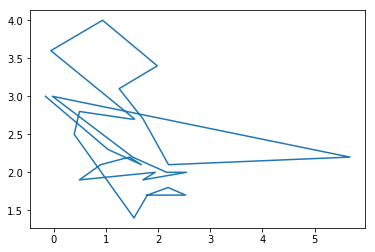

In [21]:
plt.plot(np_core, UE_rate)


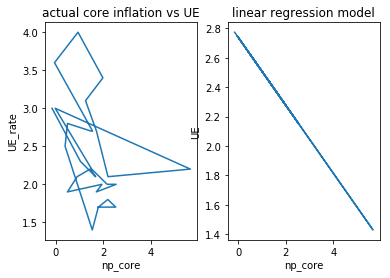

In [22]:

plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.plot(np_core, UE_rate)
plt.title("actual core inflation vs UE")
plt.xlabel('np_core')
plt.ylabel('UE_rate')

plt.subplot(1, 2, 2) # index 2
plt.plot(np_core, pred)
plt.title("linear regression model")
plt.xlabel('np_core')
plt.ylabel('UE')

plt.show()

# Conclusion:#
honestly it looks like linear regression model as a model sucks in prediction, as seen from both the R value and the graphs above but ig if you were to hold a knife to my throat and demand a trend in simplest terms, it looks like its correct to say that UE is inversely proportional to inflation. 
# Limitations#
I honestly think data is so limited, I think we could try to increase the data by looking at other countries with a longer history/combining countries. We should consider countries of the same type too (very open economy, less open economy, similar labor laws etc.). Also, we should consider unemployment as a lagging indicator (?), so maybe dial back the UE to the length of half a business cycle or so. 

# part 2#
I think what I'm going to do next is to find more data. I'm going to look at the U.S. only since I can't really find any other good datasets lmao. lmk if you guys find any. The dataset I found on FRED is $100$ years, from 1947 and both the inflation and UE is given quarterly! how nice, so you have about 400ish entries if my math is right, which is substantially more than $29$. Maybe we will see a clearer trend here! I'm still gonna pretend that the lagging indicator is not a thing first.

In [23]:
df = pd.read_csv("C:\\development\\random_data\\econs_data\\inflation\\US_quarterly.csv")
df.head(10) # I am in love with how convenient FRED made the data for comparison gosh.

,DATE,PCECTPI
0,1947-01-01,12.226
1,1947-04-01,12.324
2,1947-07-01,12.553
3,1947-10-01,12.866
4,1948-01-01,13.009
5,1948-04-01,13.143
6,1948-07-01,13.344
7,1948-10-01,13.302
8,1949-01-01,13.197
9,1949-04-01,13.116


In [24]:
CPI = np.array(df["PCECTPI"].values.tolist())
inflation = []
sum = 0
for i in CPI[1:]:
    inf = (i - CPI[sum])/CPI[sum] *100
    inflation.append(inf)
    sum+=1
inf = np.asarray(inflation).reshape(-1,1)[7:] #I only look at inflation rates from 1949 onwards cos thats the UE data start time
np.shape(inf) #now we gotta check the shape of the other one to make sure we took out the 1949-01-01 element
transformer = PolynomialFeatures(degree=2, include_bias=False) #highest being X^2
transformer.fit(inf)

PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)

In [25]:
df = pd.read_csv("C:\\development\\random_data\\econs_data\\unemployment\\US_quarterly.csv")[0:292]
df.head() #wow 5% is really high innit
len(df)

292

In [26]:
UE = np.array(df["NROU"].values.tolist())[0:290]
len(UE) #great! now both are the same length and each element in their respective positions represent the same time period!

290

In [27]:
model = LinearRegression(inf,UE)
model = LinearRegression().fit(inf, UE)
model.score(inf,UE) #wow! much more decent than before!!! still sucks but its a big improvement

0.323721522485204

In [28]:
predictions = model.predict(inf) #in-sample predictions! lets not get too ambitious lmao

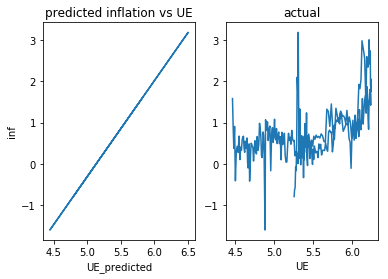

In [29]:
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.plot(predictions, inf)
plt.title("predicted inflation vs UE")
plt.xlabel('UE_predicted')
plt.ylabel('inf')

plt.subplot(1, 2, 2) # index 2
plt.plot(UE, inf)
plt.title("actual")
plt.xlabel('UE')

plt.show()

# Conclusion#
As expected, the r value is higher but  the predicted UE is just completely opposite what was predicted by my econs teacher ms lio! If the code is right (a huge if), I'm guessing this is because of stagflation, although god knows why $100$ years of data will be affected so heavily by $10$ years of stagflation, maybe the US never bothered to rehire ppl after the 1970s. Anyways, for the third part I will implement time lag in intervals of $2$ months, until my computer crashes. So what I will do is to pick the $n$th month of the inflation, and then match it with some $(n+x)$th month of UE.

In [30]:
print(inf)
print(UE)

[[-0.78935498]
 [-0.61377586]
 [-0.57944495]
 [-0.07668712]
 [-0.16116654]
 [ 0.47659313]
 [ 2.09624359]
 [ 1.77594605]
 [ 3.18068031]
 [ 0.7992008 ]
 [ 0.13450375]
 [ 1.32909155]
 [ 0.42559129]
 [-0.02084202]
 [ 0.65318602]
 [ 0.16568864]
 [ 0.37218278]
 [ 0.15106777]
 [ 0.53479602]
 [ 0.43647275]
 [ 0.50247844]
 [-0.135126  ]
 [-0.33150666]
 [-0.09503122]
 [ 0.31933687]
 [ 0.1015916 ]
 [ 0.39242219]
 [ 0.27631756]
 [ 0.40997379]
 [ 0.66934404]
 [ 0.97739362]
 [ 0.58602752]
 [ 0.89683163]
 [ 0.6358269 ]
 [ 0.81232674]
 [ 0.51800217]
 [ 1.23425372]
 [ 0.18225239]
 [ 0.07527759]
 [-0.03761048]
 [ 0.68351414]
 [ 0.40483308]
 [ 0.60790274]
 [ 0.54257352]
 [ 0.12877905]
 [ 0.5267026 ]
 [ 0.37163397]
 [ 0.4430956 ]
 [ 0.18733382]
 [-0.01206345]
 [ 0.35591482]
 [ 0.10819909]
 [ 0.43232857]
 [ 0.35872295]
 [ 0.26808054]
 [ 0.3030123 ]
 [ 0.29024997]
 [ 0.15356447]
 [ 0.4835761 ]
 [ 0.36974001]
 [ 0.47362882]
 [ 0.2153291 ]
 [ 0.33101045]
 [ 0.32991839]
 [ 0.3230645 ]
 [ 0.50603795]
 [ 0.37189

In [31]:
lag_inf = []
lag_UE = []
sum = 0
x = 2
for i in inf:
    if sum + x > len(UE) -1:
        break
    else:
        lag_inf.append(i)
        lag_UE.append(UE[sum+ x])
        sum+=1

In [32]:
lag_inf = np.array(lag_inf).reshape(-1,1)
lag_UE =np.array(lag_UE)

In [33]:
transformer = PolynomialFeatures(degree=2, include_bias=False) #highest being X^2 
transformer.fit(lag_inf)
new_inf = transformer.transform(lag_inf)

In [34]:
model = LinearRegression().fit(new_inf, lag_UE)

In [35]:
model.score(new_inf,lag_UE) #wowee its higher!!! whoohoo.

0.3433883852498367

In [36]:
np.shape(new_inf)

(288, 2)

In [37]:
x_value =[]
sum = 0
while sum <=20:
    x_value.append(sum)
    sum+=1


Now i repeat the above process, but I spam X months. and i draw a nice graph from the spamming to see if we can obtain the lag value. I am economist.

In [38]:
r_score = []
for x in x_value:
    lag_inf = []
    lag_UE = []
    sum = 0
    for i in inf:
        if sum + x > len(UE) -1:
            break
        else:
            lag_inf.append(i)
            lag_UE.append(UE[sum+ x])
            sum+=1
    lag_inf = np.array(lag_inf).reshape(-1,1)
    lag_UE =np.array(lag_UE)
    transformer = PolynomialFeatures(degree=2, include_bias=False) #highest being X^2 
    transformer.fit(lag_inf)
    new_inf = transformer.transform(lag_inf)
    model = LinearRegression().fit(new_inf, lag_UE)
    r = model.score(new_inf,lag_UE) 
    r_score.append(r)

4


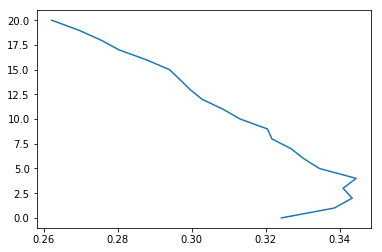

In [39]:
plt.plot(r_score, x_value) 
print(r_score.index(max(r_score)))

Wow! so it looks like a boomerang and $3$ months is the optimal value to give the highest R score. Interesting! Next, I'm gonna try and add my own idea of accuracy metric! Basically if the predicted deviates too much from the actual I categorise it as it sucks. I figure it will be correlated to the R score!!

In [40]:
r_score = []
accuracy = []
for x in x_value:
    lag_inf = []
    lag_UE = []
    sum = 0
    for i in inf:
        if sum + x > len(UE) -1:
            break
        else:
            lag_inf.append(i)
            lag_UE.append(UE[sum+ x])
            sum+=1
    lag_inf = np.array(lag_inf).reshape(-1,1)
    lag_UE =np.array(lag_UE)
    transformer = PolynomialFeatures(degree=2, include_bias=False) #highest being X^2 
    transformer.fit(lag_inf)
    new_inf = transformer.transform(lag_inf)
    model = LinearRegression().fit(new_inf, lag_UE)
    r = model.score(new_inf,lag_UE) 
    r_score.append(r)
    transformer = PolynomialFeatures(degree=2, include_bias=False) #highest being X^2 
    transformer.fit(inf)
    test_inf = transformer.transform(inf)
    predict = model.predict(test_inf)
    total = 0
    correct = 0
    for i in predict: 
        if abs(i - UE[total]) <=0.1:
            correct +=1
        total +=1
    accuracy.append(correct/total *100)

In [41]:
print(accuracy)

[19.310344827586206, 20.0, 20.0, 20.0, 20.344827586206897, 20.0, 20.0, 20.0, 20.0, 20.344827586206897, 19.655172413793103, 19.655172413793103, 19.310344827586206, 19.655172413793103, 19.655172413793103, 20.0, 19.655172413793103, 19.655172413793103, 19.310344827586206, 19.310344827586206, 19.310344827586206]


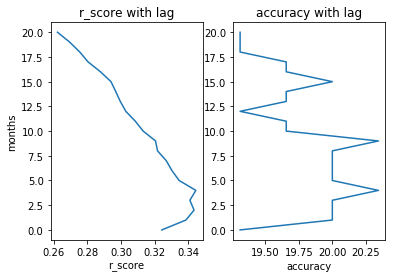

In [42]:
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.plot(r_score, x_value)
plt.title("r_score with lag")
plt.xlabel('r_score')
plt.ylabel('months')

plt.subplot(1, 2, 2) # index 2
plt.plot(accuracy, x_value)
plt.title("accuracy with lag")
plt.xlabel('accuracy')

plt.show()

oh.

# Conclusion#
In this fun-filled, boredom-driven activity, I looked at Singapore and the U.S.'s data using linear regression and did some simple, and probably wrong, analysis. For SG, the r value is so bad, probably because of there being no data at all lmao. For the U.S., the r value is better but its still really low at like $0.3$, would have liked it to be $0.7$ish :(. Anyways, this probably means inflation isn't a really strong indicator for UE? or it could mean i coded wrongly (highly likely). Also, I looked at the possiblity of time lag, which kind of boosted the r score a bit, if the time lag = $3$ months. Any higher, and woosh the r score goes down which is probably q intuitive as to why. Also, its quite cool to note that the highest accuracy values are at $3$ months (expected since r score is highest there) AND $8$ months! wow! what's going on there! idk lmao

# Next part, I try (emphasis on try) to add some actual rigor!#
Hmm, I wonder what will happen if we directly input in the equations for the Phillips curve. I copied the equations over from some textbook, that was incredibly detailed. 

anyways, as is well-known:
<br>
<br>
$W = p^E * F(U,Z)$
<br> 
<br>

where $W$ is the nominal wage, $p^E$ is the expected price level, $F(U,Z)$ is some function relating unemployment rate, $U$ to the wage and any other variables, $Z$. Note that $p^E$ is often taken into account due to the fact that workers negotiate for their yearly salary based on their predicted level of inflation.

$p = (1+m)*W$
<br> 
<br>
Now this very simple production function has a few assumptions that is most probably not realistic irl but meh. Firstly, we assume that labor is the sole factor inputs. Secondly, we assume that the FOP exhibit constant returns to scale. Given these conditions, $m$ is the mark-up price, which basically gives you an idea of how much a price-setting ability the firm has (if only one firm hires everyone, they get to dictate the prices).

Whoo! We have our first two equations. Simple substitution of the first equation into the second should now yield:
<br>
<br>
$p = (1+m)* p^E * F(U,Z)$

Next up: more simplifying assumptions! Let's actually define $F(U,Z)$. 
<br> 
<br>
$F(U,Z) = 1 - \alpha u +z$
<br>
<br>
One thought that I had, and still have, is why we can just assume $u$ has a coefficient of $1$. If you know, pls lmk thanks! Maybe the degree of $u$ does not affect the math? idk i never tried to use $u^x$ inside for some $x$. Anyways, lets proceed with the substitution.

$p = (1+m)* p^E * (1 - \alpha u +z)$
<br>
<br>
Next, from this equation, we derive the inflation rate. Derivation is trivial (actually it really isn't but its long-winded and extra so I can't be bothered with typing it out with LaTeX. So use your imagination pls.
<br>
<br>
$\Pi _T = {\Pi_t}^e + (m-z) - \alpha u_t$
<br>
<br>
now note that I added the t, this is because we will be looking at different inflation rates later on and it will be important to distinguish between them.
<br>
<br>
Hmm, so how do we define ${\Pi_t}^e$?
<br>
<br>
${\Pi_t}^e = \varphi \Pi_{t-1}$ 
<br>
<br> where $\varphi$ is an empirically determined value known as the persistence of inflation. Wow, another empirically determined value. I guess that's more work for us later on huh. If previous years' of inflation was low, $\varphi$ will generally be low. Suppose inflation was $0.1$% for the past 1000 years, but suddenly there was a rise of inflation to $2$%: $\varphi$ will still be low as people will treat that year as an anomaly. The same argument can be made for high inflation.

Anyways, let's update our equation then. Our master equation is looking clean and swell!
<br>
<br>
$\Pi _T = \varphi \Pi_{t-1} + (m-z) - \alpha u_t$

# Expectations augmented Phillips Curve#
This model is really cool because it explains the ideas of Phillips from the monetarist' pov. The need for this probably arose due to the stagflation period, which showed that the Phillips curve really wasn't accurate, or correct at all. Basically, the idea is that while it may be true that a trade-off between UE and inflation exist in the short-run, if policymakers exploit this trade-off too often, economic agents will wise up and adjust their behaviours everytime inflation rises (when policymakers try to decrease unemployment) (rip money illusion). I find the graphical explanation provided to be much more illuminating, so you can probably take a look at that (go and find it online). Mathematically, what this means is that $\varphi = 1$. So in other words, the expectations augmented Phillips Curve is defined as:
<br>
<br>
$\Pi _T = \Pi_{t-1} + (m-z) - \alpha u_t$
<br> 
<br>
How very convenient!

Next, we put in the natural UE rate. This is defined as the rate where actual price level equals the expected price level. In other words, in the long-run, the UE rate will probably head towards this natural UE rate. Now recall, from above, this lovely equation:
<br>
<br>
$\Pi _T = {\Pi_t}^e + (m-z) - \alpha u_t$
<br>
<br>
So at the natural UE rate, 
<br>
<br>
$\Pi _T = {\Pi_t}^e$
<br>
<br>
$\implies 0 =  (m-z) - \alpha u_n$
<br>
<br>
$\implies u_n = \frac {(m+z)}{\alpha}$
<br>
<br>
woah I displayed a fraction, I'm so proud of myself. Go me! Now, recall subbing in the natural rate into the previous equation gives us a nice final equation:
<br> 
<br>
$\Pi _T = \Pi_{t-1} + (m-z) - \alpha u_t$
<br>
<br>
$\implies \Pi_t - \Pi_{t-1} = - \alpha (u_t - u_n)$
<br>
OR $\implies \Pi_t - {\Pi_t}^e = - \alpha (u_t - u_n)$
<br>
<br>
note that you can also write $\Pi_{t-1}$ as ${\Pi_t}^e$ since they are equal.



# future exploration!#
We now have a bunch of equations that we can test to see if its true or not, which is great! So here's 4 possible parts.
<br>
1. Find the value of m in $p = (1+m)*W$. I'm not too sure how to do this still but my thought process is to go and find the $p$ and $W$ of the US from the past 100 years on FRED (I saw that dataset exist before). But my queries are that $p, W, m$ should not be the same for each industry. Maybe $p$ can be measured using CPI, $W$ measured using median household income? But that's still a bit iffy and the derived $m$ feels a bit weird. 
<br>

2. Use the equation $\Pi _T = \varphi \Pi_{t-1} + (m-z) - \alpha u_t$! I hope there's literature on the value of $\varphi$ lol. I guess one concern is that $(m-z)$ appear to be variables. But hopefully we can treat them as constants, since those things may not have too much change over time. Although this may be a good point to research on in the future (when i actually learn how to code and do economics). With a known $\varphi$, we can probably calculate the value of $(m-z), \alpha$ with our dataset.

3. Use the equation $u_n = \frac {(m+z)}{\alpha}$ to find the natural rate of unemployment.

4. Use the equation $\Pi_t - \Pi_{t-1} = - \alpha (u_t - u_n)$ to predict the value of $u_t$! Woohoo!



# Part 2: ARIMA models#
Honestly speaking, I really can't find jack on $\varphi$ across the $100$ years in literature and I'm at a loss of what to do for it. Anyways, since this is a notebook on how various tools work, I figure it may be a good idea to try out an ARIMA model to find ${\Pi_t}^e$. Then, using the equation ${\Pi_t}^e = \varphi \Pi_{t-1}$, I'll calculate the value of $\varphi$ of that year. For convenience, I'll denote $\varphi$ of the $t$^th year as $\varphi_t$.

ARIMA (Auto Regressive Integrated Moving Average) models basically try to predict future values based solely on past values. This is perfect for our case since we only have past inflation values to work on. Obviously, there are several limitations I can think of. For instance, if inflation expectations are changed due to an exogenous event, which I'm sure happened alot in the 1950-2000s, we won't be able to really accurately predict that from the dataset. But this is the best I can think of for now. Feel free to lmk if y'all have any better ideas! 

# Box Jenkins Method:#
1. Identification
2. Estimation
3. Diagnostic Checking

# Making our data stationary#
Non-stationary time series should be converted to stationary time series. This means that things, such as seasonal trends, should be eliminated from the data. Ideally, the mean, variance, covariance of a randomly chosen sample of data over a period of time should be the same (time-invariant). Suppose you have a data sample of stock prices over 20 years, which you have converted to become a stationary time series. Theoretically, if you choose a data sample of 5 consecutive years, anywhere within this 20 years' data, the resulting data sample should be time-invariant. 

# Types of patterns you see in a time series!# 
1. Trend:
Trends are long term smooth patterns, they are typically more than 1 year in length.
2. Seasonal:
Seasonal patterns are regular patterns, but they last less than 1 year.
3. Cyclical:
Cylcical patterns are wave-like in nature. The difference between seasonal and cyclical is that cyclical tends to be more than 1 year usually.
4. Random:
After you extract these 3 patterns, the remaining stuff left is considered as random noise. So what is random noise.


# Why bother?#
Apparently, any stationary data can be modelled roughly by a stationary ARIMA model, according to the Wold decomposition theorem, which you can read more about on wikipedia.com. Conversion usually means taking the difference between two consecutive values(The current value - the previous value). First though, we need to carry out the augmented Dickey-Fuller test, which tests for the stationarity of the time series. After all, if the time series is stationary already, there's no point in converting it.  

# Dickey-Fuller test#
So in our code, we actually used the augmented DF test. But to understand the ADF test, we should look at the DF test first. 
Suppose there is a linear regression model of equation: 
<br>
<br>
$Y_t = \beta_0 +\phi Y_{t-1} +\epsilon_t$
where $\epsilon_t \sim N(0, {\sigma_t}^2)$
<br>
<br>
To test $H_0: |\phi = 0|$ vs   $H_1: |\phi \neq 1|$
from:
<br>
<br>
$Y_t = \beta_0 +\phi Y_{t-1} +\epsilon_t$
<br>
<br>
$\implies Y_t - Y_{t-1} = \beta_0 - (1-\phi)Y_{t-1} + \epsilon_t$
<br>
<br>
$\Delta = \beta_0 -\delta Y_{t-1} + \epsilon_t$
<br>
<br>
$\implies$ if $\delta = 0$, system has a unit root
<br>
<br>
To test $H_0: |\delta =0|$ vs   $H_1: |\delta \neq 0|$

<br>
<br>

the ADF test is used for more complicated time series models:
$\Delta y_t = \alpha +\beta t + \gamma y_{t-1} + \delta_1 \Delta y_{t-1} ... + \epsilon_t$

# ACF #
autocorrelation refers to the way the time series are related to each other. This is used to find the no. of lags.
<br>
<br>
$\rho_k = corr(Y_t, Y_{t-p}) = \frac {corr(Y_t, Y_{t-p})}{\sqrt(var(Y_t))\sqrt(var(Y_{t-p})} $

# OMG OMG H2 MATH TIME FINALLY SOMETHING IN THE SYLLABUS#
To test $H_0$: time series is non-stationary vs $H_1$: time series is stationary.
<br>
Conduct ACF test at $5$% significance level.


In [43]:
from statsmodels.tsa.stattools import adfuller 
from numpy import log
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA


In [44]:
#part 2#
df = pd.read_csv("C:\\development\\random_data\\econs_data\\inflation\\US_quarterly.csv")
CPI = np.array(df["PCECTPI"].values.tolist())
inflation = []
sum = 0
for i in CPI[1:]:
    inf = (i - CPI[sum])/CPI[sum] *100
    inflation.append(inf)
    sum+=1
inf = np.array(inflation)
result = adfuller(inf)
print("p-value = " + str(result[1]))

p-value = 0.17637777476544703


As p-value $< 0.05$, there is insufficient evidence to conclude at $5$% significance level that time series is stationary. 

# Finding order of differencing by looking at some nice graphs#

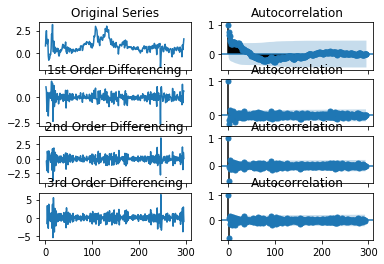

In [45]:
inf_df = df = pd.DataFrame (inflation, columns = ['inflation'])
# Original Series
fig, axes = plt.subplots(4, 2, sharex=True)
axes[0, 0].plot(inf_df.to_numpy()); axes[0, 0].set_title('Original Series')
plot_acf(inf_df.to_numpy(), ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(inf_df.diff().to_numpy()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(inf_df.diff().dropna().to_numpy(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(inf_df.diff().diff().to_numpy()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(inf_df.diff().diff().dropna().to_numpy(), ax=axes[2, 1])

#3rd Differencing
axes[3, 0].plot(inf_df.diff().diff().diff().to_numpy()); axes[3, 0].set_title('3rd Order Differencing')
plot_acf(inf_df.diff().diff().diff().dropna().to_numpy(), ax=axes[3, 1])

plt.show()

Uh. I mean. I guess 2nd order differencing makes it weakly stationary? In that case, order of differencing $d = 2$.

# Finding AR terms with PACF plots#
Partial correlation is trying to find the correlation between the individual time lags and the time series. Suppose time lags of $1,2,3$ years back are significant in influencing the time series, and you wish to find the effects of the $3$rd year on the time series. A partial correlation graph removes the effects of the intermediate years ($1,2$ years) and shows you the individual effect of the $3$rd year time lag on the time series. PACF plots are useful in telling us how many time lags are significant in influencing our time series, so we will know how many AR terms to include for our model. What are these AR terms? Read below to find out.

C:\development\Anaconda3\envs\berrytensor\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


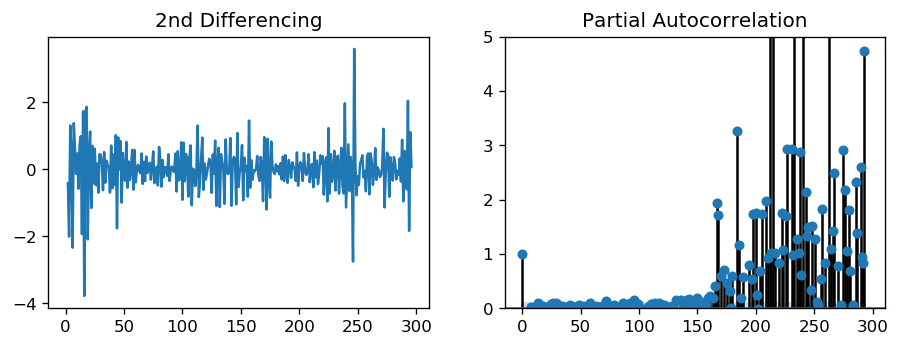

In [46]:
# PACF plot of 2nd differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(inf_df.diff().diff().to_numpy()); axes[0].set_title('2nd Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(inf_df.diff().diff().dropna().to_numpy(), ax=axes[1])

plt.show()

#I think the x-axis is the order of AR terms. 

Yeah let's pretend that AR term = 1. Query that I never got. Do we even need to bother looking at all those big numbers >10? 

# Finding MA term order with ACF plots#

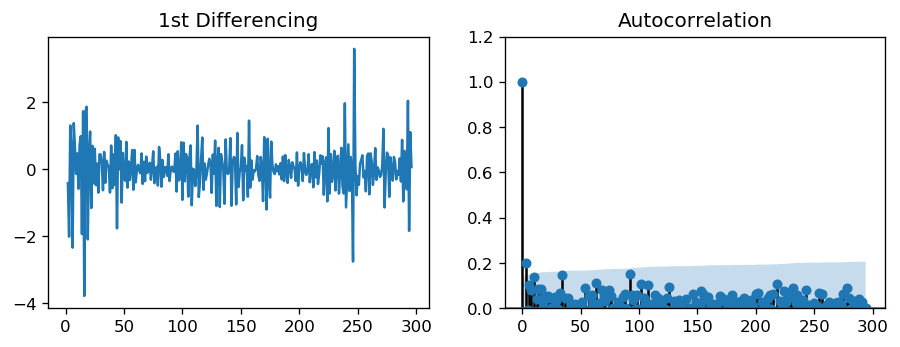

In [47]:
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(inf_df.diff().diff().to_numpy()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(inf_df.diff().diff().dropna().to_numpy(), ax=axes[1])

plt.show()

Yeah thats much better, looks like a 1 to me. Copy-pasting from a website:
If your series is slightly under differenced, adding one or more additional AR terms usually makes it up. Likewise, if it is slightly over-differenced, try adding an additional MA term.



# Building ARIMA model!#
An AR(n) model has the equation:
<br>
<br>
$Y_t = \alpha +\sum_{i=1}^{n}X_{t-i}{\beta}_{i} + \sum_{i=1}^{n} \epsilon_{t-i}{\phi}_{i} $
<br> 
<br>
where $\sum_{i=1}^{n}X_{t-i}{\beta}_{i}$ represents the AR terms (which we found to be 2 since the order of differencing is 2). In other words, only those 2 terms significantly influence the time series and should be considered in our model. 

<br>
 $\sum_{i=1}^{n} \epsilon_{t-i}{\phi}_{i}$ represents the MA terms (which we found to be 1). 
 <br>
 Copy-pasting from that very nice website again:
 <br>
 Predicted Yt = Constant + Linear combination Lags of Y (upto p lags) + Linear Combination of Lagged forecast errors (upto q lags)


For later use:
these are the 3 arguments for the ARIMA() function.
p,d, q = 1, 2 ,1
d is the order of difference, q is the MA and p is the lag value for autoregression.

In [48]:
# 1,1,2 ARIMA Model
model = ARIMA(inf_df.to_numpy(), order=(1,2,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                  295
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -183.869
Method:                       css-mle   S.D. of innovations              0.447
Date:                Mon, 04 Oct 2021   AIC                            375.738
Time:                        12:16:56   BIC                            390.486
Sample:                             2   HQIC                           381.643
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.538e-05      0.000      0.271      0.786      -0.000       0.001
ar.L1.D2.y    -0.2628      0.057     -4.627      0.000      -0.374      -0.151
ma.L1.D2.y    -0.9999      0.009   -114.588      0.0

Lets just remember to come back to this and learn how to interpret all the data some other day.

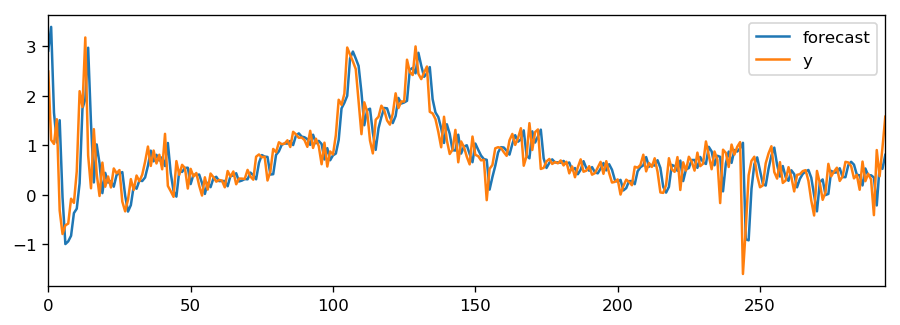

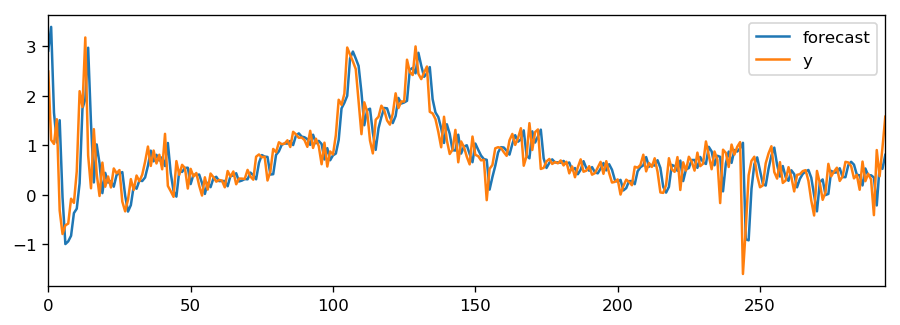

In [49]:
model_fit.plot_predict(dynamic=False)


Wow it work!
# Conclusion#
Great, I got exposed to ARIMA models. But now I realise this is kinda useless since I basically just accurately predicted in-samples of inflation rates. I might as well have just tried to equate $\Pi_{t}^e = \Pi_t$. Well, I'm sure that will come in handy some day won't it.

# Wage indexation!# (section incomplete, pg 177)
something I will probably not know how to explore with actual data but its a possibility!
<br>
<br>
$\Pi_t = [ \lambda \Pi_t + (1- \lambda) {\Pi_t}^e] - \alpha(u_t - u_n)$
<br>
<br>
Now then, whats all this nonsense? Wage indexation explores the idea that people get paid in intervals that make the adjustment of wages more flexible. Recall from above that I mentioned that expected prices are important because people bargain wages on a yearly basis. But this is often not the case, with some people having wage adjusted on a monthly, or even weekly basis. If this happens, the above equation is more flexible in describing the situation. $\lambda$ represents the portion of people who are like this (or are 'indexed').
$\implies \Pi_t = [ \lambda \Pi_t + (1- \lambda) {\Pi_t}^e] - \alpha(u_t - u_n)$